In [29]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas as pd
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt
import rasterio
import os
plt.style.use('ggplot')

1046360


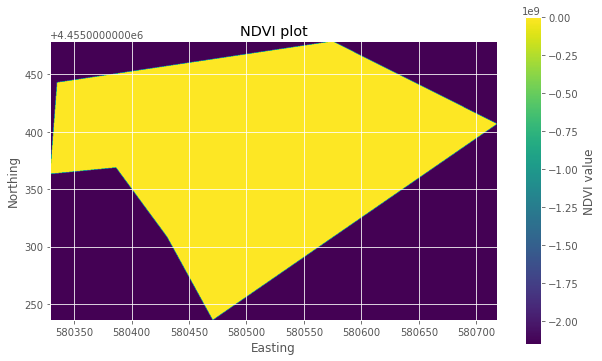

In [6]:
tif_file = r"C:\Users\jdt45\Documents\Projects\Wiggins Map\File Rasters\ndvi_parcels\05113_HWY_6.tif"

with rasterio.open(tif_file) as src:
    # Read the raster data
    raster_data = src.read()
    # Get metadata
    meta = src.meta
    transform = src.transform
    num_pixels = src.width * src.height
    
left, bottom, right, top = src.bounds
x = [left, right]
y = [bottom, top]
print(num_pixels)
# Plot the raster data (assuming single band)
plt.figure(figsize=(10, 10))
plt.imshow(raster_data[0], cmap='viridis', extent=(x[0],x[1],y[0],y[1]))
plt.colorbar(shrink = .6,  label = "NDVI value")
plt.xlabel("Easting"); plt.ylabel("Northing")
plt.title('NDVI plot')
# plt.savefig("NDVI")
plt.show()

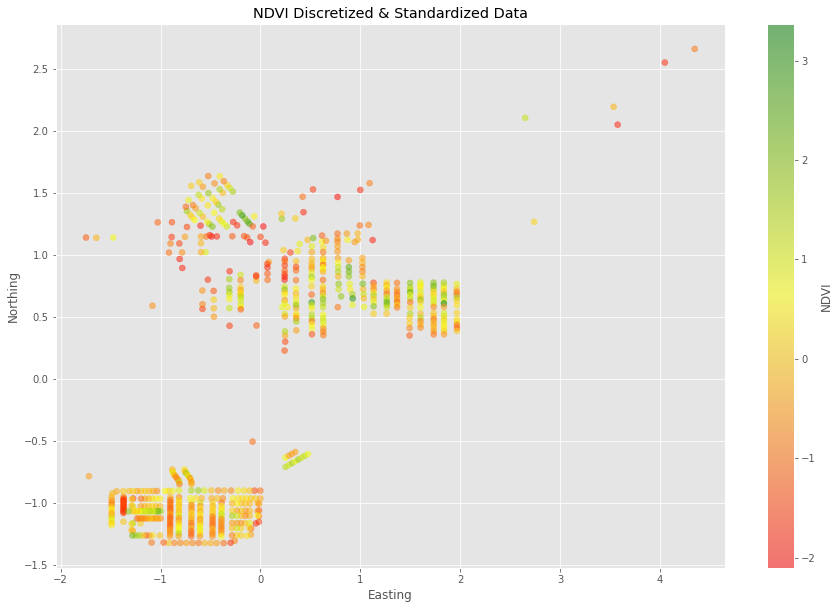

(661,)


In [20]:
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv(r"C:\Users\jdt45\Documents\Projects\Wiggins Map\File Rasters\ndvi_parcels\values.csv")



x_values = (df['Longitude'] - df['Longitude'].mean()) /df['Longitude'].std()
y_values = (df['Latitude'] - df['Latitude'].mean() )/ df['Latitude'].std()
values = df['Average_Value']

data_standardized = (values - np.mean(values)) / np.std(values)

combined_data = np.column_stack((x_values, y_values, data_standardized))

colors = [(0, 'red'), (.5, 'yellow'), (1, 'green')]
cmap_ndvi = LinearSegmentedColormap.from_list('ndvi', colors)

# Create a scatter plot
plt.figure(figsize = (15,10))
plt.scatter(x_values, y_values, c=data_standardized, cmap=cmap_ndvi, alpha=0.5)
plt.colorbar(label='NDVI')  # Add colorbar
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NDVI Discretized & Standardized Data')
plt.grid(True)
plt.savefig("NDVI_disc_full")
plt.show()
print(np.shape(combined_data[:,2]))

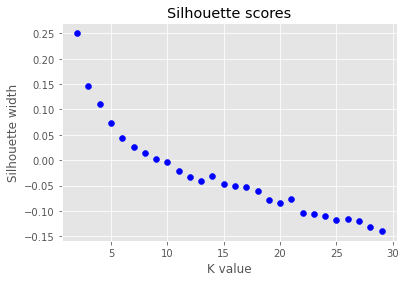


Best number of clusters (highest Silhouette width value): k=2


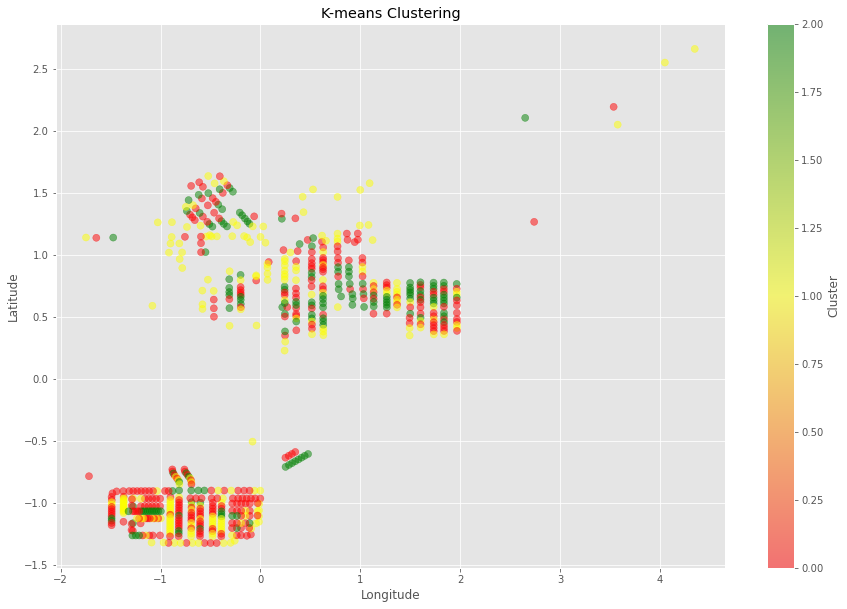

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import random

k_values = range(2, 30)
random_numbers = [round(random.random()*100) for _ in range(30)]
cluster_assignments = {}
silhouette_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state = random_numbers[k])
    cluster_assignments[k] = kmeans.fit_predict(combined_data[:,2].reshape(-1, 1))
    silhouette_scores[k] = silhouette_score(combined_data, cluster_assignments[k])
for k, score in silhouette_scores.items():
    plt.scatter(k,score, c = 'b')
plt.xlabel('K value'); plt.ylabel('Silhouette width');plt.title('Silhouette scores')
plt.savefig('Silhouette_NT')
plt.show()
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest number of clusters (highest Silhouette width value): k={best_k}")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_data[:,2].reshape(-1, 1))

# Get cluster labels
labels = kmeans.labels_

df = pd.read_csv(r"C:\Users\jdt45\Documents\Projects\Wiggins Map\File Rasters\ndvi_parcels\values.csv")

df['Labels'] = labels

df.to_csv('clustered_data.csv', index=False)

# Visualize the results
plt.figure(figsize=(15, 10))
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=labels, s=50, cmap = cmap_ndvi, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.savefig("K-means_cluster_NT")
plt.show()

In [37]:
new_directory = r"C:\Users\jdt45\Documents\Projects\Wiggins Map\File Rasters\ndvi_parcels"

# Change the current working directory
os.chdir(new_directory)
# Set the folder path

current_directory = os.getcwd()

files_in_directory = os.listdir('./')

all_files = []
# Print the files
print("Files in current directory:")
for file in files_in_directory:
    all_files.append(file)

# print(all_files)
# Filter the list to include only files of the desired type (e.g., TIF files)
tif_files = [file for file in all_files if file.endswith('.tif')]
# print(tif_files)

processed_entries = [entry.replace('_', ' ').replace('.tif', '') for entry in tif_files]
print(processed_entries)

df = pd.read_csv(r"C:\Users\jdt45\Documents\Projects\Wiggins Map\clustered_data.csv")

df['Address'] = processed_entries
df.head()

df.to_csv('clustered_data_w_address.csv', index=False)

Files in current directory:
['03338 HWY 6', '03374 CO RD P', '03771 CO RD P', '04379 HWY 6', '04647 CO RD Q', '04683 HWY 6', '05113 HWY 6', '100 11TH AVE', '100 BLUEBELL CT', '100 LARKSPUR CT', '100 N JASPER ST', '100 PARK VIEW CT', '100 PRIMROSE CT', '100 WILDCAT PKWY', '101 11TH AVE', '101 BLUEBELL CT', '101 E FOURTH AVE', '101 LARKSPUR CT', '101 MAIN ST', '101 N AGATE ST', '101 N JASPER ST', '101 PARK VIEW CT', '101 PEARL ST', '101 PRIMROSE CT', '102 11TH AVE', '102 BLUEBELL CT', '102 E THIRD AVE', '102 LARKSPUR CT', '102 MAIN ST', '102 N JASPER ST', '102 PARK VIEW CT', '102 PEARL ST', '102 PRIMROSE CT', '102 WILDCAT PKWY', '103 11TH AVE', '103 BLUEBELL CT', '103 E FOURTH AVE', '103 LARKSPUR CT', '103 MAIN ST', '103 PARK VIEW CT', '103 PRIMROSE CT', '103 RIDGE ST', '104 11TH AVE', '104 BLUEBELL CT', '104 E CORONA AVE', '104 E FOURTH AVE', '104 LARKSPUR CT', '104 N JASPER ST', '104 N MAIN ST', '104 PARK VIEW CT', '104 PEARL ST', '104 PRIMROSE CT', '104 RIDGE ST', '105 11TH AVE', '105